In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [301]:
studentDataMath = pd.read_csv("student-mat.csv", sep = ';')
studentDataPor = pd.read_csv("student-por.csv", sep = ';')

In [302]:
fullData = studentDataMath.append(studentDataPor)
fullData.drop_duplicates(inplace = True)

# Notes on Attributes

school - student's school (GP: Gabriel Pereira, MS: Mousinho da Silveira)

sex- student's sex (M/F)

age- student's age (15-22)

address- student's home address type (U: Urban, R: Rural)

famsize- family size (LE3 = less or equal to 3, GT3 = greater than 3)

Pstatus - parent's cohabitation status (T = together, A = apart)

Medu- mother's education/Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)

Mjob- mother's job/Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

Key attributes: 


    G1 - first period grade (numeric: from 0 to 20)
    
    G2 - second period grade (numeric: from 0 to 20)
    
    G3 - final grade (numeric: from 0 to 20, output target) [3rd period]


# Initial Data Processing

In [303]:
fullData.isnull().values.any() #Indicates no rows to drop.

False

In [304]:
fullData["Grade_Avg"] = round((fullData["G1"] + fullData["G2"] + fullData["G3"] / 3),2)

# Population Characterization

Understand Number of Students at Both Schools

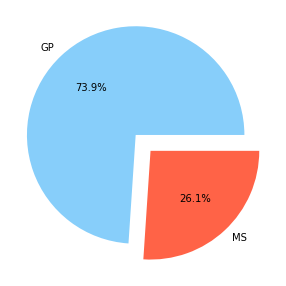

In [305]:
schools = ["GP", "MS"]
 
studentCounts = [len(fullData[fullData["school"] == "GP"].index), len(fullData[fullData["school"] == "MS"].index)]
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347"]
explode = [0.1, 0.1]
plt.pie(studentCounts, colors = color, labels = schools, autopct='%1.1f%%', explode=explode)
 
# show plot
plt.show()

Understand Gender Distribution

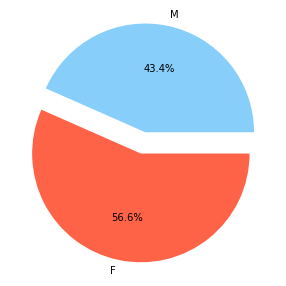

In [306]:
schools = ["M", "F"]
 
studentCounts = [len(fullData[fullData["sex"] == "M"].index), len(fullData[fullData["sex"] == "F"].index)]
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347"]
explode = [0.1, 0.1]
plt.pie(studentCounts, colors = color, labels = schools, autopct='%1.1f%%', explode=explode)
 
# show plot
plt.show()

Understand Age Distribution of students

C:\Users\david.DESKTOP-094SULL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution Among Students')

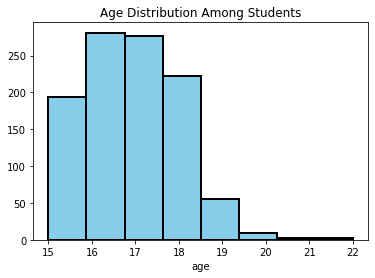

In [307]:
sns.distplot(fullData["age"], hist_kws={"alpha":1, "color":"skyblue", "edgecolor" : "k", "linewidth":2}, kde=False, bins=8)
plt.title("Age Distribution Among Students")

Understand distribution of addresses and in relation to technology

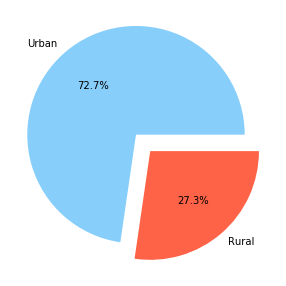

In [308]:
schools = ["Urban", "Rural"]
 
studentCounts = [len(fullData[fullData["address"] == "U"].index), len(fullData[fullData["address"] == "R"].index)]
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347"]
explode = [0.1, 0.1]
plt.pie(studentCounts, colors = color, labels = schools, autopct='%1.1f%%', explode=explode)
 
# show plot
plt.show()

Text(0.5, 1.0, 'Distribution of Students at Different Schools Based on Address')

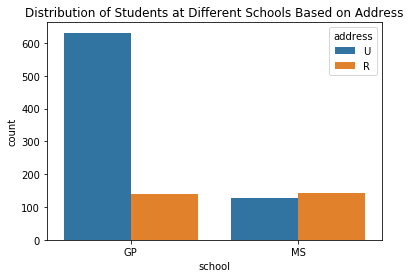

In [309]:
sns.countplot(x="school", hue="address", data=fullData)
plt.title("Distribution of Students at Different Schools Based on Address")

Text(0.5, 1.0, 'Distribution of Internet Status Based on Address')

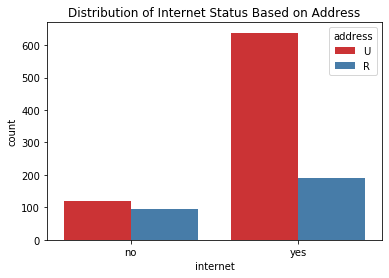

In [310]:
sns.countplot(x="internet", hue="address", data=fullData, palette = "Set1")
plt.title("Distribution of Internet Status Based on Address")

Understanding Family Dynamics

In [311]:
print("GT3: " + str(fullData["famsize"].value_counts(normalize=True)[0] * 100))
print("LT3: " + str(fullData["famsize"].value_counts(normalize=True)[1] * 100))

GT3: 70.6896551724138
LT3: 29.310344827586203


Text(0.5, 1.0, 'Family Relationship With Student for Different Family Sizes')

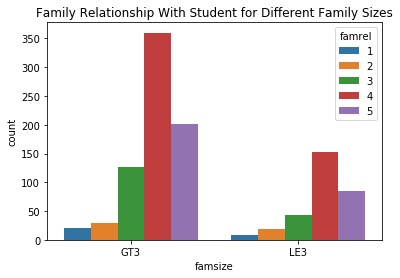

In [312]:
sns.countplot(x ='famsize', hue = "famrel", data = fullData)
plt.title("Family Relationship With Student for Different Family Sizes")

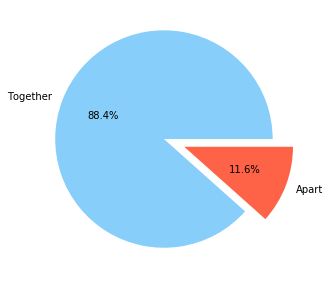

In [313]:
schools = ["Together", "Apart"]
 
studentCounts = [len(fullData[fullData["Pstatus"] == "T"].index), len(fullData[fullData["Pstatus"] == "A"].index)]
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347"]
explode = [0.1, 0.1]
plt.pie(studentCounts, colors = color, labels = schools, autopct='%1.1f%%', explode=explode)
 
# show plot
plt.show()

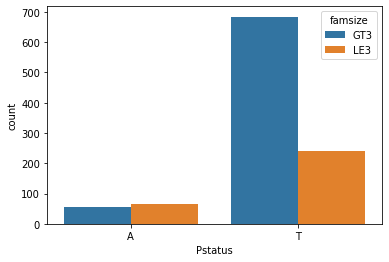

In [314]:
sns.countplot(x="Pstatus", hue="famsize", data=fullData)

Text(0.5, 1.0, "Mother's Job Given Education Level")

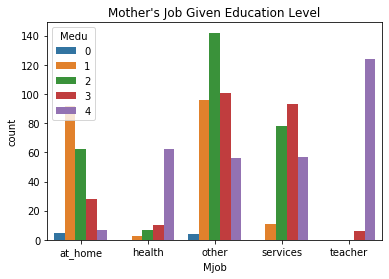

In [315]:
sns.countplot(x="Mjob", hue="Medu", data=fullData)
plt.title("Mother's Job Given Education Level")

Text(0.5, 1.0, "Father's Job Given Education Level")

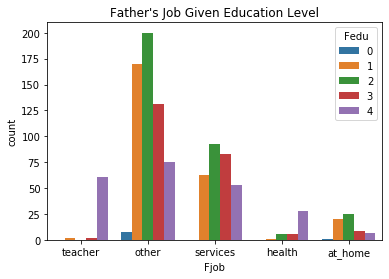

In [316]:
sns.countplot(x="Fjob", hue="Fedu", data=fullData)
plt.title("Father's Job Given Education Level")

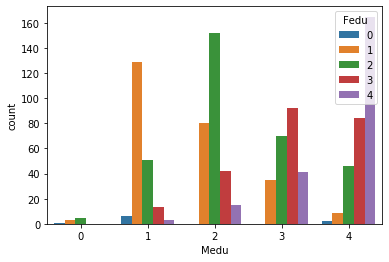

In [317]:
sns.countplot(x="Medu", hue ="Fedu", data=fullData)

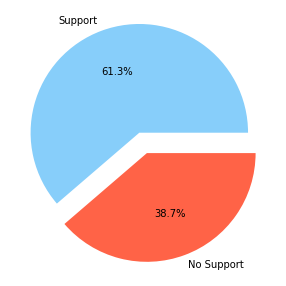

In [318]:
familySup = ["Support", "No Support"]
 
studentCounts = [len(fullData[fullData["famsup"] == "yes"].index), len(fullData[fullData["famsup"] == "no"].index)]
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347"]
explode = [0.1, 0.1]
plt.pie(studentCounts, colors = color, labels = familySup, autopct='%1.1f%%', explode=explode)
 
# show plot
plt.show()

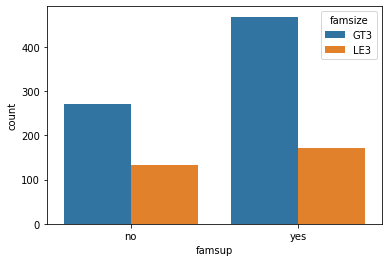

In [319]:
sns.countplot(x="famsup", hue='famsize', data=fullData)

Understanding Study Time and Freetime

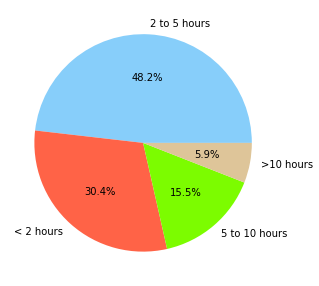

In [320]:
label = ["2 to 5 hours", "< 2 hours", "5 to 10 hours", ">10 hours"]
 
studentCounts = fullData["studytime"].value_counts().tolist()
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347", "lawngreen", "#DEC599"]

plt.pie(studentCounts, colors = color, labels = label, autopct='%1.1f%%')
 
# show plot
plt.show()

Text(0.5, 1.0, 'Distribution of Freetime Available for Students')

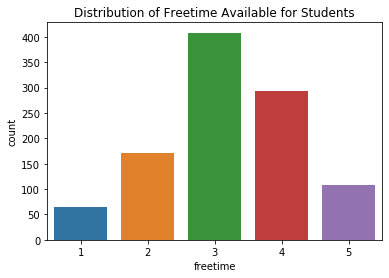

In [321]:
sns.countplot(x="freetime", data=fullData)
plt.title("Distribution of Freetime Available for Students")

Romantic Relationship

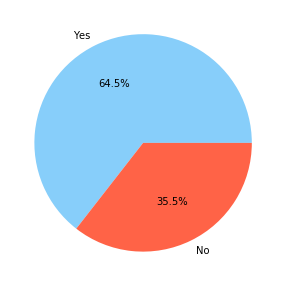

In [322]:
label = ["Yes", "No"]
 
studentCounts = fullData["romantic"].value_counts().tolist()
 
# Creating plot
fig = plt.figure(figsize =(5, 5))
color = ["lightskyblue", "#ff6347"]

plt.pie(studentCounts, colors = color, labels = label, autopct='%1.1f%%')
 
# show plot
plt.show()

# Analysis with Attributes and Grades


Based on research- family dynamics, health, absences, school system, social life (balance with school)
are main reasons

School and Grades

In [323]:
fullData

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_Avg
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,13.00
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,12.00
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,18.33
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,34.00
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,19.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,24.33
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,35.33
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,26.00
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,23.33


Text(0.5, 1, 'Grade Distribution for Different Schools')

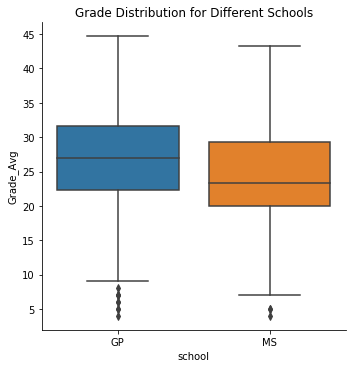

In [324]:
sns.catplot(x="school", y="Grade_Avg", kind="box", data=fullData)
plt.title("Grade Distribution for Different Schools")

In [325]:
fullData.groupby(["school"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
GP,772.0,26.919326,7.039016,4.0,22.3300,27.00,31.67,44.67
MS,272.0,24.313603,7.386355,4.0,19.9175,23.33,29.33,43.33


Conclusion: GP students have a greater overall grade

How does school support impact the grades?

Firstly, we should look at school support and the different school systems

In [326]:
gp = fullData["school"] == "GP"
studentsGP= fullData[gp]
ms = fullData["school"] == "MS"
studentsMS = fullData[ms]

Text(0.5, 1, 'Distribution of Grades Based on School Support at the Two Different Schools')

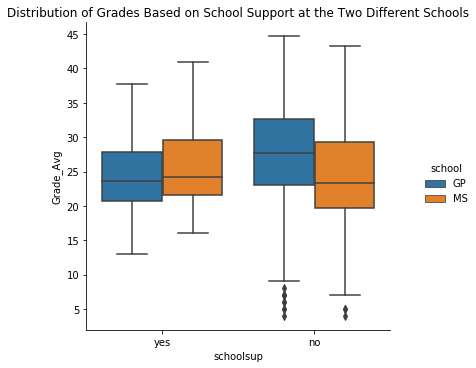

In [327]:
sns.catplot(x="schoolsup", y="Grade_Avg", hue="school", kind="box", data=fullData)
plt.title("Distribution of Grades Based on School Support at the Two Different Schools")

In [328]:
fullData.groupby(["school", "schoolsup"])["Grade_Avg"].describe()

count       mean       std   min      25%    50%      75%  \
school schoolsup                                                              
GP     no         665.0  27.417639  7.198178   4.0  23.0000  27.67  32.6700   
       yes        107.0  23.822336  4.957906  13.0  20.6700  23.67  27.8350   
MS     no         260.0  24.251154  7.403287   4.0  19.6700  23.33  29.3300   
       yes         12.0  25.666667  7.178616  16.0  21.5825  24.17  29.5825   

                    max  
school schoolsup         
GP     no         44.67  
       yes        37.67  
MS     no         43.33  
       yes        41.00

In [329]:
print("Gabriel Pereira")
print("%s%% get support at Gabriel Pereira" % (100*round(studentsGP.schoolsup.value_counts(normalize=True)[0],4)))
print("%s%% do not get support at Gabriel Pereira" % (100*round(studentsGP.schoolsup.value_counts(normalize=True)[1],4)))
print()
print("Mousinho da Silveira")
print("%s%% get support at Mousinho da Silveira" % (100*round(studentsMS.schoolsup.value_counts(normalize=True)[0],4)))
print("%s%% do not get support at Mousinho da Silveira" % (100*round(studentsMS.schoolsup.value_counts(normalize=True)[1],4)))

Gabriel Pereira
86.14% get support at Gabriel Pereira
13.86% do not get support at Gabriel Pereira

Mousinho da Silveira
95.59% get support at Mousinho da Silveira
4.41% do not get support at Mousinho da Silveira


Understanding Student Health and Grades

First, let's look at the health attribute and its distribution

C:\Users\david.DESKTOP-094SULL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Health Status for Students at Two Schools')

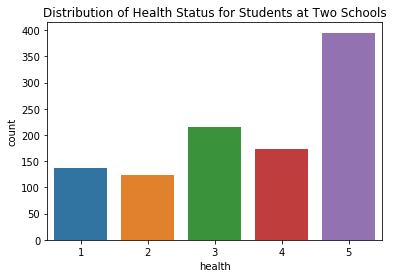

In [330]:
sns.countplot(fullData.health) #Most students are very healthy
plt.title("Distribution of Health Status for Students at Two Schools")

C:\Users\david.DESKTOP-094SULL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Absence Distribution for Very Unhealthy')

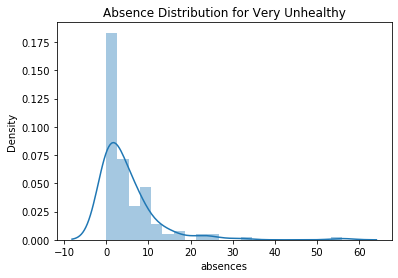

In [331]:
sns.distplot(fullData.loc[fullData["health"] == 1].absences)
plt.title("Absence Distribution for Very Unhealthy")

C:\Users\david.DESKTOP-094SULL\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Absence Distribution for Moderately Healthy')

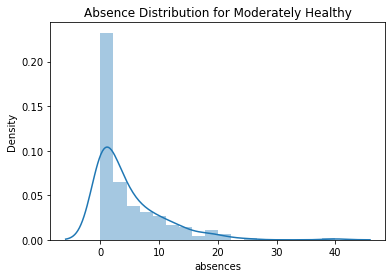

In [332]:
sns.distplot(fullData.loc[fullData["health"] == 3].absences)
plt.title("Absence Distribution for Moderately Healthy")

No strong correlation between absence and health

Looking at health and grades individually

Text(0.5, 1, 'Distribution of Grades Based on Health Status')

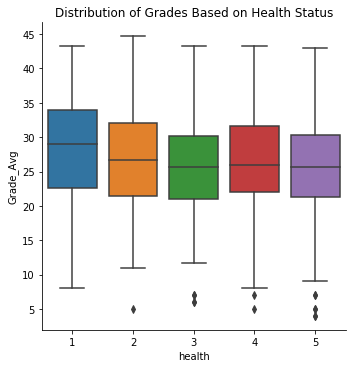

In [333]:
sns.catplot(x="health", y="Grade_Avg", kind="box", data=fullData)
plt.title("Distribution of Grades Based on Health Status")

In [334]:
fullData.groupby(["health"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
health,,,,,,,,
1,137.0,27.783577,7.537586,8.0,22.6700,29.00,34.000,43.33
2,123.0,26.872602,7.415449,5.0,21.5000,26.67,32.000,44.67
3,215.0,25.609163,7.047459,6.0,21.0000,25.67,30.165,43.33
4,174.0,26.490230,7.176587,5.0,22.0825,26.00,31.670,43.33
5,395.0,25.741949,7.090407,4.0,21.3300,25.67,30.330,43.00


Lower overall health students seem to perform better on average, but the 25% IQR is about the same across all health status

Alcohol and Grades

C:\Users\david.DESKTOP-094SULL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


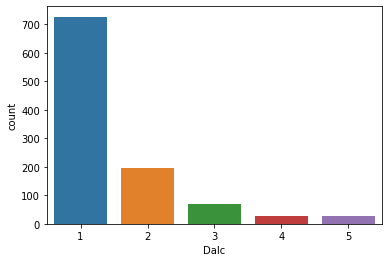

In [335]:
sns.countplot(fullData.Dalc) #Most studnts do not drink daily. Keep in mind, most students are not of age.

C:\Users\david.DESKTOP-094SULL\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


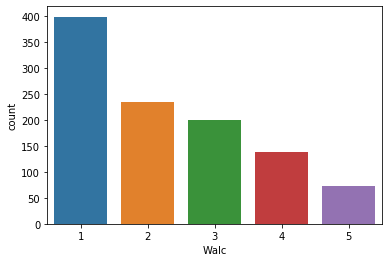

In [336]:
sns.countplot(fullData.Walc) #Weekly alcohol consumption is more varied.

Let's consider alcohol in relation to grades

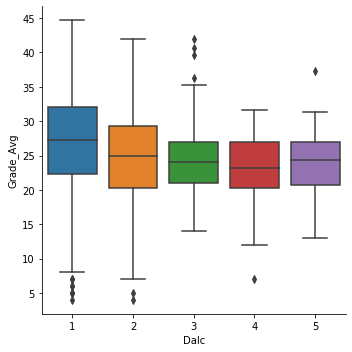

In [337]:
sns.catplot(x="Dalc", y="Grade_Avg",
            kind="box", dodge=False, data=fullData)

In [338]:
fullData.groupby(["Dalc"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
Dalc,,,,,,,,
1,727.0,26.930330,7.329866,4.0,22.3300,27.33,32.0000,44.67
2,196.0,25.028980,7.213866,4.0,20.3300,25.00,29.3300,42.00
3,69.0,24.791884,5.651902,14.0,21.0000,24.00,27.0000,42.00
4,26.0,22.551923,6.170165,7.0,20.3300,23.17,26.9975,31.67
5,26.0,23.615385,5.525982,13.0,20.7525,24.33,26.9175,37.33


Higher grades for those who are least likely to drink every day

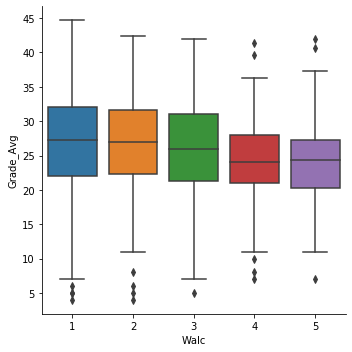

In [339]:
sns.catplot(x="Walc", y="Grade_Avg",
            kind="box", dodge=False, data=fullData)

In [340]:
fullData.groupby(["Walc"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
Walc,,,,,,,,
1,398.0,27.020000,7.528393,4.0,22.00,27.33,32.0000,44.67
2,235.0,26.781787,7.328482,4.0,22.33,27.00,31.6700,42.33
3,200.0,26.188500,7.036102,5.0,21.33,26.00,31.0000,42.00
4,138.0,24.294565,6.049444,7.0,21.00,24.00,27.9175,41.33
5,73.0,24.068356,6.708797,7.0,20.33,24.33,27.3300,42.00


Weekly drinks who are in 1-3 category have slightly better grades

Freetime, Friends, and Romantic Relationships with Grades (mental health)

Text(0.5, 1, 'Distribution of Grades Based on How Often Students Hang Out With Friends')

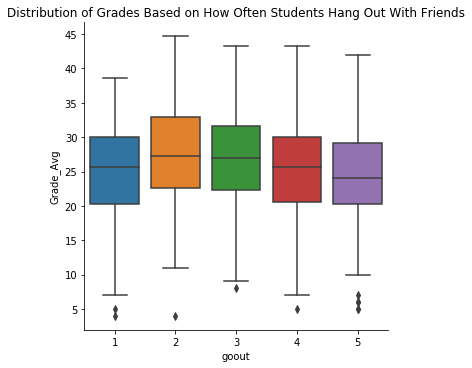

In [341]:
sns.catplot(x="goout", y="Grade_Avg", kind="box", data=fullData)
plt.title("Distribution of Grades Based on How Often Students Hang Out With Friends")

In [342]:
fullData.groupby(["goout"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
goout,,,,,,,,
1,71.0,24.680845,7.105629,4.0,20.330,25.67,30.000,38.67
2,248.0,27.728306,7.281951,4.0,22.585,27.33,33.000,44.67
3,335.0,26.869642,6.776245,8.0,22.330,27.00,31.670,43.33
4,227.0,25.609692,7.138691,5.0,20.500,25.67,30.000,43.33
5,163.0,24.241288,7.564798,5.0,20.330,24.00,29.165,42.00


Those who go out sometimes have the highest grades

Text(0.5, 1, 'Grade Distribution Based on Free Time')

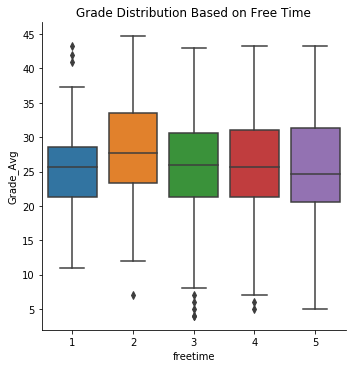

In [343]:
sns.catplot(x="freetime", y="Grade_Avg", kind="box", data=fullData)
plt.title("Grade Distribution Based on Free Time")

In [344]:
fullData.groupby(["freetime"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
freetime,,,,,,,,
1,64.0,25.660469,6.795330,11.0,21.330,25.67,28.58,43.33
2,171.0,28.187310,7.028273,7.0,23.330,27.67,33.50,44.67
3,408.0,25.933922,7.141257,4.0,21.330,26.00,30.67,43.00
4,293.0,25.899966,7.106970,5.0,21.330,25.67,31.00,43.33
5,108.0,25.583241,7.943995,5.0,20.585,24.67,31.33,43.33


Those who have some freetime have the highest grade

In [345]:
fullData["Grade_Avg"]

0      13.00
1      12.00
2      18.33
3      34.00
4      19.33
       ...  
644    24.33
645    35.33
646    26.00
647    23.33
648    24.67
Name: Grade_Avg, Length: 1044, dtype: float64

Health and Absences

In [346]:
#Classifying Average
averageRank = []
avg = statistics.mean(fullData["Grade_Avg"])
for finalGrade in fullData["Grade_Avg"]:
    if(finalGrade < avg):
        averageRank.append("Below Class Average")
    elif(finalGrade > avg):
        averageRank.append("Above Class Average")
    else:
        averageRank.append("Average")
fullData["Avg_Grade Class"] = averageRank



In [347]:
fullData.loc[fullData["Avg_Grade Class"] == "Average"] #No students got exactly the average obviously

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_Avg,Avg_Grade Class


Text(0.5, 1, 'Absence Distribution Based on Grade Average')

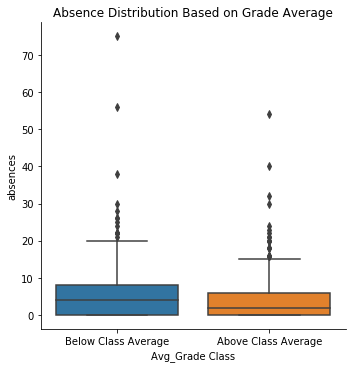

In [348]:
sns.catplot(x="Avg_Grade Class", y="absences", kind="box", data=fullData)
plt.title("Absence Distribution Based on Grade Average")

In [349]:
fullData.groupby(["Avg_Grade Class"])["absences"].describe()

,count,mean,std,min,25%,50%,75%,max
Avg_Grade Class,,,,,,,,
Above Class Average,517.0,3.798839,5.495431,0.0,0.0,2.0,6.0,54.0
Below Class Average,527.0,5.058824,6.786418,0.0,0.0,4.0,8.0,75.0


Conclusion: Students who better grades had fewer absences

Demographics (age, family relationship, parental status)

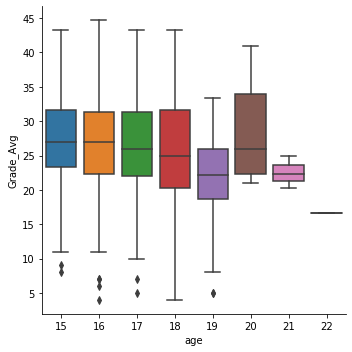

In [350]:
sns.catplot(x="age", y="Grade_Avg", kind="box", data=fullData)

In [351]:
fullData.groupby(["age"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15,194.0,27.086082,6.552542,8.00,23.33,27.00,31.670,43.33
16,281.0,26.782954,6.777685,4.00,22.33,27.00,31.330,44.67
17,277.0,26.518448,7.116698,5.00,22.00,26.00,31.330,43.33
18,222.0,25.636757,8.228381,4.00,20.33,25.00,31.670,43.33
19,56.0,21.827679,6.290033,5.00,18.67,22.17,25.920,33.33
20,9.0,28.221111,7.079960,21.00,22.33,26.00,34.000,41.00
21,3.0,22.553333,2.342997,20.33,21.33,22.33,23.665,25.00
22,2.0,16.670000,0.000000,16.67,16.67,16.67,16.670,16.67


Overall, older students have lower grades. There are fewer older students however

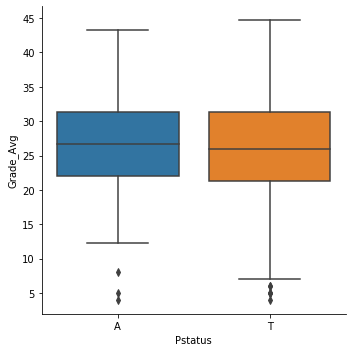

In [352]:
sns.catplot(x="Pstatus", y="Grade_Avg", kind="box", data=fullData)

In [353]:
fullData.groupby(["Pstatus"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
Pstatus,,,,,,,,
A,121.0,26.443471,7.453428,4.0,22.00,26.67,31.33,43.33
T,923.0,26.213824,7.191235,4.0,21.33,26.00,31.33,44.67


Very similar grades despite differences in family structure

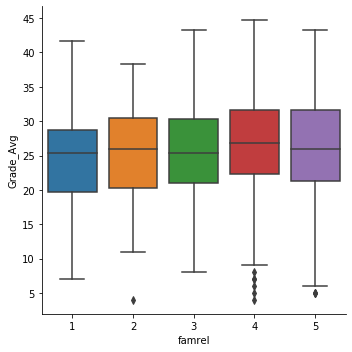

In [354]:
sns.catplot(x="famrel", y="Grade_Avg", kind="box",data=fullData)

In [355]:
fullData.groupby(["famrel"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
famrel,,,,,,,,
1,30.0,24.644667,7.561186,7.0,19.7525,25.335,28.6675,41.67
2,47.0,25.347660,7.833792,4.0,20.3300,26.000,30.5000,38.33
3,169.0,25.508994,6.972608,8.0,21.0000,25.330,30.3300,43.33
4,512.0,26.737559,7.030194,4.0,22.3300,26.835,31.6700,44.67
5,286.0,26.096818,7.518740,5.0,21.3300,26.000,31.5850,43.33


It is important to note however that students who have a better relationship with their family have better grades.


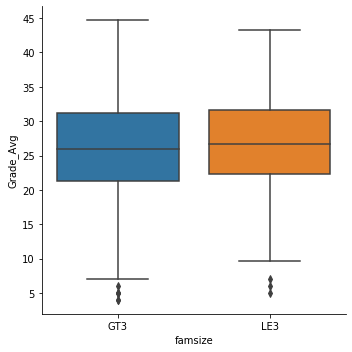

In [356]:
sns.catplot(x="famsize", y="Grade_Avg", kind="box", data=fullData)

In [357]:
fullData.groupby(["famsize"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
famsize,,,,,,,,
GT3,738.0,25.957602,7.333568,4.0,21.33,26.00,31.2475,44.67
LE3,306.0,26.922582,6.898343,5.0,22.33,26.67,31.6700,43.33


Smaller famalies do better on average in terms of grades

Some additional areas that seem like common sense

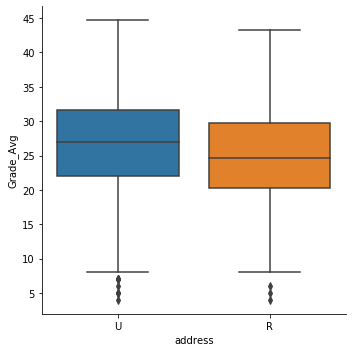

In [358]:
sns.catplot(x="address", y="Grade_Avg", kind="box", data=fullData)

In [359]:
fullData.groupby(["address"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,285.0,24.757930,7.269379,4.0,20.33,24.67,29.67,43.33
U,759.0,26.797115,7.125247,4.0,22.00,27.00,31.67,44.67


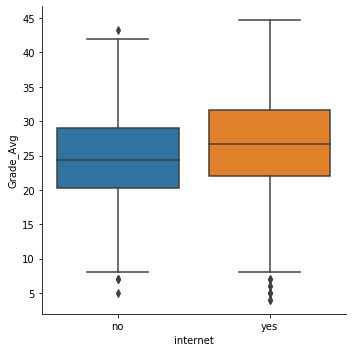

In [360]:
sns.catplot(x="internet", y="Grade_Avg", kind="box", data=fullData)

In [361]:
fullData.groupby(["internet"])["Grade_Avg"].describe()

,count,mean,std,min,25%,50%,75%,max
internet,,,,,,,,
no,217.0,24.575945,7.215673,5.0,20.33,24.33,29.00,43.33
yes,827.0,26.677195,7.160141,4.0,22.00,26.67,31.67,44.67


Both having internet and living in an urban environment show improved grades

# Analysis of All Features and Correlation

Data Cleaning

In [362]:
fullData['school'] = fullData['school'].map({'GP': 0, 'MS': 1}).astype(int)
fullData['sex'] = fullData['sex'].map({'M': 0, 'F': 1}).astype(int)
fullData['address'] = fullData['address'].map({'R': 0, 'U': 1}).astype(int)
fullData['famsize'] = fullData['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)
fullData['Pstatus'] = fullData['Pstatus'].map({'A': 0, 'T': 1}).astype(int)
fullData['Mjob'] = fullData['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
fullData['Fjob'] = fullData['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)
fullData['reason'] = fullData['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)
fullData['guardian'] = fullData['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)
fullData['schoolsup'] = fullData['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)
fullData['famsup'] = fullData['famsup'].map({'no': 0, 'yes': 1}).astype(int)
fullData['paid'] = fullData['paid'].map({'no': 0, 'yes': 1}).astype(int)
fullData['activities'] = fullData['activities'].map({'no': 0, 'yes': 1}).astype(int)
fullData['nursery'] = fullData['nursery'].map({'no': 0, 'yes': 1}).astype(int)
fullData['higher'] = fullData['higher'].map({'no': 0, 'yes': 1}).astype(int)
fullData['internet'] = fullData['internet'].map({'no': 0, 'yes': 1}).astype(int)
fullData['romantic'] = fullData['romantic'].map({'no': 0, 'yes': 1}).astype(int)

In [363]:
fullData.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Grade_Avg
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,...,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,0.260536,0.566092,16.726054,0.727011,0.706897,0.884100,2.603448,2.387931,2.027778,2.246169,...,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954,26.240441
std,0.439138,0.495850,1.239975,0.445708,0.455404,0.320259,1.124907,1.099938,1.244815,0.863522,...,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796,7.218827
min,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,0.000000,0.000000,16.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000,21.330000
50%,0.000000,1.000000,17.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000,26.000000
75%,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,31.330000
max,1.000000,1.000000,22.000000,1.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,44.670000


In [364]:
fullData.corr()["Grade_Avg"].sort_values(ascending=False)

Grade_Avg     1.000000
G2            0.972489
G1            0.948450
G3            0.927306
higher        0.268468
Medu          0.231646
studytime     0.199539
Fedu          0.192613
reason        0.144004
address       0.125904
Mjob          0.125412
internet      0.118168
Fjob          0.075208
activities    0.059642
nursery       0.050946
famrel        0.044122
sex           0.027385
famsup       -0.005313
Pstatus      -0.010188
paid         -0.031645
guardian     -0.036741
famsize      -0.060876
freetime     -0.064430
health       -0.079326
romantic     -0.085123
absences     -0.086977
goout        -0.108600
schoolsup    -0.110959
age          -0.128028
traveltime   -0.132150
Walc         -0.137807
Dalc         -0.145394
school       -0.158512
failures     -0.394671
Name: Grade_Avg, dtype: float64

In [365]:
gradeLabels = []
percentages = []
max_grade = 20
for i in fullData["Grade_Avg"]:
    percentage = (i/max_grade) * 100
    percentages.append(percentage)
    if (percentage in range(90, 101)):
        gradeLabels.append("A")
    elif(percentage in range(80, 90)):
        gradeLabels.append("B")
    elif(percentage  in range(70, 80)):
        gradeLabels.append("C")
    elif(percentage  in range(60, 70)):
        gradeLabels.append("D")
    else:
        gradeLabels.append("F")
fullData["Letter Grade"] = gradeLabels
fullData['Letter Grade'] = fullData['Letter Grade'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F' : 4}).astype(int)
    
    

Preare lists for input into model

In [366]:
#Remove grades as they are the target.
features = fullData.columns.tolist()
features.remove("G1")
features.remove("G2")
features.remove("G3")
features.remove("Grade_Avg")
features.remove("Avg_Grade Class")
features.remove("Letter Grade")

In [367]:
X = fullData[features]


In [368]:
y = fullData[["Letter Grade"]].copy()

# Model Creation and Grade Prediction

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [370]:
from sklearn.tree import DecisionTreeClassifier
gradeTreeClassifier = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=len(X.columns), max_features="sqrt", max_depth=12)   
gradeTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features='sqrt', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [371]:
y_predict = gradeTreeClassifier.predict(X_test)

In [372]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.9012738853503185

In [373]:
letters = []
for grade in y_predict:
    if(grade == 0):
        letters.append("A")
    elif(grade == 1):
        letters.append("B")
    elif(grade == 2):
        letters.append("C")
    elif(grade == 3):
        letters.append("D")
    elif(grade == 4):
        letters.append("F")
        

In [374]:
data_tuples = list(zip(gradeLabels,letters))
pd.DataFrame(data_tuples, columns =["Original Letter Grade", "Predicted Letter Grade"])

,Original Letter Grade,Predicted Letter Grade
0,D,F
1,D,F
2,F,F
3,F,F
4,F,F
...,...,...
309,F,F
310,A,F
311,F,F
312,F,F
